# PLOTLY - Open Source Graphing Library for Python

https://plotly.com/python/

https://plotly.com/python/imshow/

https://plotly.com/python-api-reference

https://www.tutorialspoint.com/plotly/plotly_quick_guide.htm

In [1]:
# !pip install plotly
# !pip install dash #reaktif web uygulamaları oluşturmak için geliştirilmiştir.dash board
# !pip install wordcloud #özellikle kelime bulutu nlp alanında kullanılabilir bir kelimenin önemi için
# !pip install cufflinks #pandas kütüphanesi ile çalışabilen bir kütüphanedir.
# !pip install missingno #kayıp verileri görselleştirmek için

In [1]:
pip show plotly

Name: plotlyNote: you may need to restart the kernel to use updated packages.

Version: 5.9.0
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: c:\users\lenovo\anaconda3\lib\site-packages
Requires: tenacity
Required-by: cufflinks, dash


In [2]:
from plotly.offline import init_notebook_mode, iplot, plot 

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import os 

# plotly

import plotly as py
init_notebook_mode(connected = True) #inline olarak görüntülemek için başlatıyoruz same to = %matplotlib inline

import plotly.graph_objs as go # veri görselleştirme için düşük düzey arayüz
import plotly.express as px # veri görselleştirme için üst düzey arayüz kısaca daha komplex bir görsel için daha az kod satırı

#!pip install dash
from dash import Dash, dcc, html, Input, Output #dcc interaktiflik kazandırıyor, 

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
import cufflinks as cf #pandas kütüphanesi ile çalışabilen bir kütüphanedir.
cf.go_offline() #grafikleri offline olarak yapıyoruz

# warnings
import warnings
warnings.filterwarnings("ignore")

from plotly.offline import init_notebook_mode, iplot, plot

## Submodules

plotly.express :Plotly Express, high-level interface for data visualization

plotly.graph_objects :Graph Objects, low-level interface to figures, traces and layout

plotly.subplots : Subplots, helper function for layout out multi-plot figures ""

plotly.figure_factory : Figure Factories, helper methods for building specific complex charts ""

plotly.io : I/O, low-level interface for displaying, reading and writing figures

plotly.colors: colorscales and utility functions

plotly.data: built-in datasets for demonstration, educational and test purposes

In [4]:
timesData = pd.read_csv("https://raw.githubusercontent.com/arnaudbenard/university-ranking/master/timesData.csv")

In [5]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [6]:
timesData.sample(10)

world_rank                                university_name  \
1443         42              Washington University in St Louis   
1858        =56                       University of Manchester   
520     301-350                    Sapienza University of Rome   
133         132                             University of Iowa   
2540    601-800                               Qatar University   
205           6                        University of Cambridge   
1131        129                         Trinity College Dublin   
1222    201-225  University of Science and Technology of China   
379         180                         University of Delaware   
1332    301-350                       University of Canterbury   

                       country  teaching international  research  citations  \
1443  United States of America      57.6          46.5      55.2       97.1   
1858            United Kingdom      58.4          87.0      66.0       77.3   
520                      Italy      29.6          32.4      27.2       29.2   
133   United States of America      48.6          31.7      59.8       54.8   
2540                     Qatar       9.9          99.9      10.3       22.3   
205             United Kingdom      90.5          85.3      94.2       97.3   
1131       Republic of Ireland      33.1          85.9      25.2       85.4   
1222                     China      38.7          25.8      26.1       69.6   
379   United States of America      26.4          29.8      37.2       66.7   
1332               New Zealand      18.2          88.0      24.4       51.6   

     income total_score num_students  student_staff_ratio  \
1443      -        67.8       12,528                  5.7   
1858   42.0        68.1       34,938                 15.3   
520    32.8           -      120,986                 32.3   
133       -        53.3       27,526                 11.6   
2540   55.2           -        9,583                 19.0   
205    55.5        92.4       18,812                 11.8   
1131   30.8        50.3       15,521                 18.0   
1222   69.4           -       14,290                  7.9   
379    98.0        43.8       19,262                 15.9   
1332   52.3           -       12,187                 16.5   

     international_students female_male_ratio  year  
1443                    17%               NaN  2015  
1858                    34%           52 : 48  2016  
520                      7%           59 : 41  2012  
133                     11%           52 : 48  2011  
2540                    42%           74 : 26  2016  
205                     34%           46 : 54  2012  
1131                    25%           57 : 43  2014  
1222                     2%               NaN  2014  
379                     10%           56 : 44  2012  
1332                    20%           51 : 49  2014

In [8]:
timesData[timesData['country']=='Turkey']

world_rank                   university_name country  teaching  \
111         112                Bilkent University  Turkey      34.3   
182         183  Middle East Technical University  Turkey      39.5   
401     201-225                Bilkent University  Turkey      27.9   
480     276-300     Istanbul Technical University  Turkey      25.1   
482     276-300  Middle East Technical University  Turkey      37.0   
506     301-350               Boğaziçi University  Turkey      24.5   
808     201-225  Middle East Technical University  Turkey      50.8   
827     226-250                Bilkent University  Turkey      34.7   
834     226-250                    Koç University  Turkey      20.4   
881     276-300               Boğaziçi University  Turkey      35.4   
884     276-300     Istanbul Technical University  Turkey      34.9   
1200        199               Boğaziçi University  Turkey      20.5   
1207    201-225     Istanbul Technical University  Turkey      26.2   
1210    201-225  Middle East Technical University  Turkey      39.2   
1229    226-250                Bilkent University  Turkey      24.4   
1281    276-300                    Koç University  Turkey      16.6   
1486         85  Middle East Technical University  Turkey      45.5   
1540        139               Boğaziçi University  Turkey      28.5   
1566        165     Istanbul Technical University  Turkey      30.2   
1584        182                Sabancı University  Turkey      26.0   
1603    201-225                Bilkent University  Turkey      28.0   
1715    301-350                    Koç University  Turkey      21.6   
2075    251-300                    Koç University  Turkey      21.2   
2153    351-400                Bilkent University  Turkey      22.6   
2183    351-400                Sabancı University  Turkey      22.3   
2313    501-600               Boğaziçi University  Turkey      21.2   
2337    501-600     Istanbul Technical University  Turkey      19.2   
2356    501-600  Middle East Technical University  Turkey      29.9   
2413    601-800                Anadolu University  Turkey      12.2   
2461    601-800                Erciyes University  Turkey      15.5   
2478    601-800              Hacettepe University  Turkey      21.0   
2485    601-800               Istanbul University  Turkey      26.0   
2599    601-800       Yıldız Technical University  Turkey      14.5   

     international  research  citations income total_score num_students  \
111           47.7      36.1       95.7   32.4        55.4          NaN   
182           27.2      39.5       66.4   43.9        47.7       25,779   
401           48.5      22.3       60.8   29.4           -          NaN   
480           18.9      18.2       48.9   99.1           -       34,550   
482           23.5      28.9       35.1   43.2           -       25,779   
506           36.2      19.7       45.7   34.7           -       11,506   
808           28.0      46.0       44.6   50.6           -       25,779   
827           42.0      30.5       60.1   39.9           -          NaN   
834           52.8      22.3       79.2   37.9           -        4,488   
881           36.7      33.9       48.1   38.4           -       11,506   
884           20.8      25.5       52.9   98.0           -       34,550   
1200          49.8      22.8       88.2   45.9        44.3       11,506   
1207          35.7      19.2       82.3   68.2           -       34,550   
1210          31.2      30.0       56.4   57.0           -       25,779   
1229          43.7      26.0       69.2   46.6           -          NaN   
1281          57.8      17.1       72.1   41.1           -        4,488   
1486          38.7      36.9       92.0   55.2        56.6       25,779   
1540          54.1      27.6       96.8   47.7        51.1       11,506   
1566          37.3      36.9       79.7   51.1        48.1       34,550   
1584          44.6      27.1       88.5   42.9        46.9        2,739   
1603          4

In [10]:
timesData.head(10)

world_rank                        university_name                   country  \
0          1                     Harvard University  United States of America   
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   
3          4                    Stanford University  United States of America   
4          5                   Princeton University  United States of America   
5          6                University of Cambridge            United Kingdom   
6          6                   University of Oxford            United Kingdom   
7          8     University of California, Berkeley  United States of America   
8          9                Imperial College London            United Kingdom   
9         10                        Yale University  United States of America   

   teaching international  research  citations income total_score  \
0      99.7          72.4      98.7       98.8   34.5        96.1   
1      97.7          54.6      98.0       99.9   83.7        96.0   
2      97.8          82.3      91.4       99.9   87.5        95.6   
3      98.3          29.5      98.1       99.2   64.3        94.3   
4      90.9          70.3      95.4       99.9      -        94.2   
5      90.5          77.7      94.1       94.0   57.0        91.2   
6      88.2          77.2      93.9       95.1   73.5        91.2   
7      84.2          39.6      99.3       97.8      -        91.1   
8      89.2          90.0      94.5       88.3   92.9        90.6   
9      92.1          59.2      89.7       91.5      -        89.5   

  num_students  student_staff_ratio international_students female_male_ratio  \
0       20,152                  8.9                    25%               NaN   
1        2,243                  6.9                    27%           33 : 67   
2       11,074                  9.0                    33%           37 : 63   
3       15,596                  7.8                    22%           42 : 58   
4        7,929                  8.4                    27%           45 : 55   
5       18,812                 11.8                    34%           46 : 54   
6       19,919                 11.6                    34%           46 : 54   
7       36,186                 16.4                    15%           50 : 50   
8       15,060                 11.7                    51%           37 : 63   
9       11,751                  4.4                    20%           50 : 50   

   year  
0  2011  
1  2011  
2  2011  
3  2011  
4  2011  
5  2011  
6  2011  
7  2011  
8  2011  
9  2011

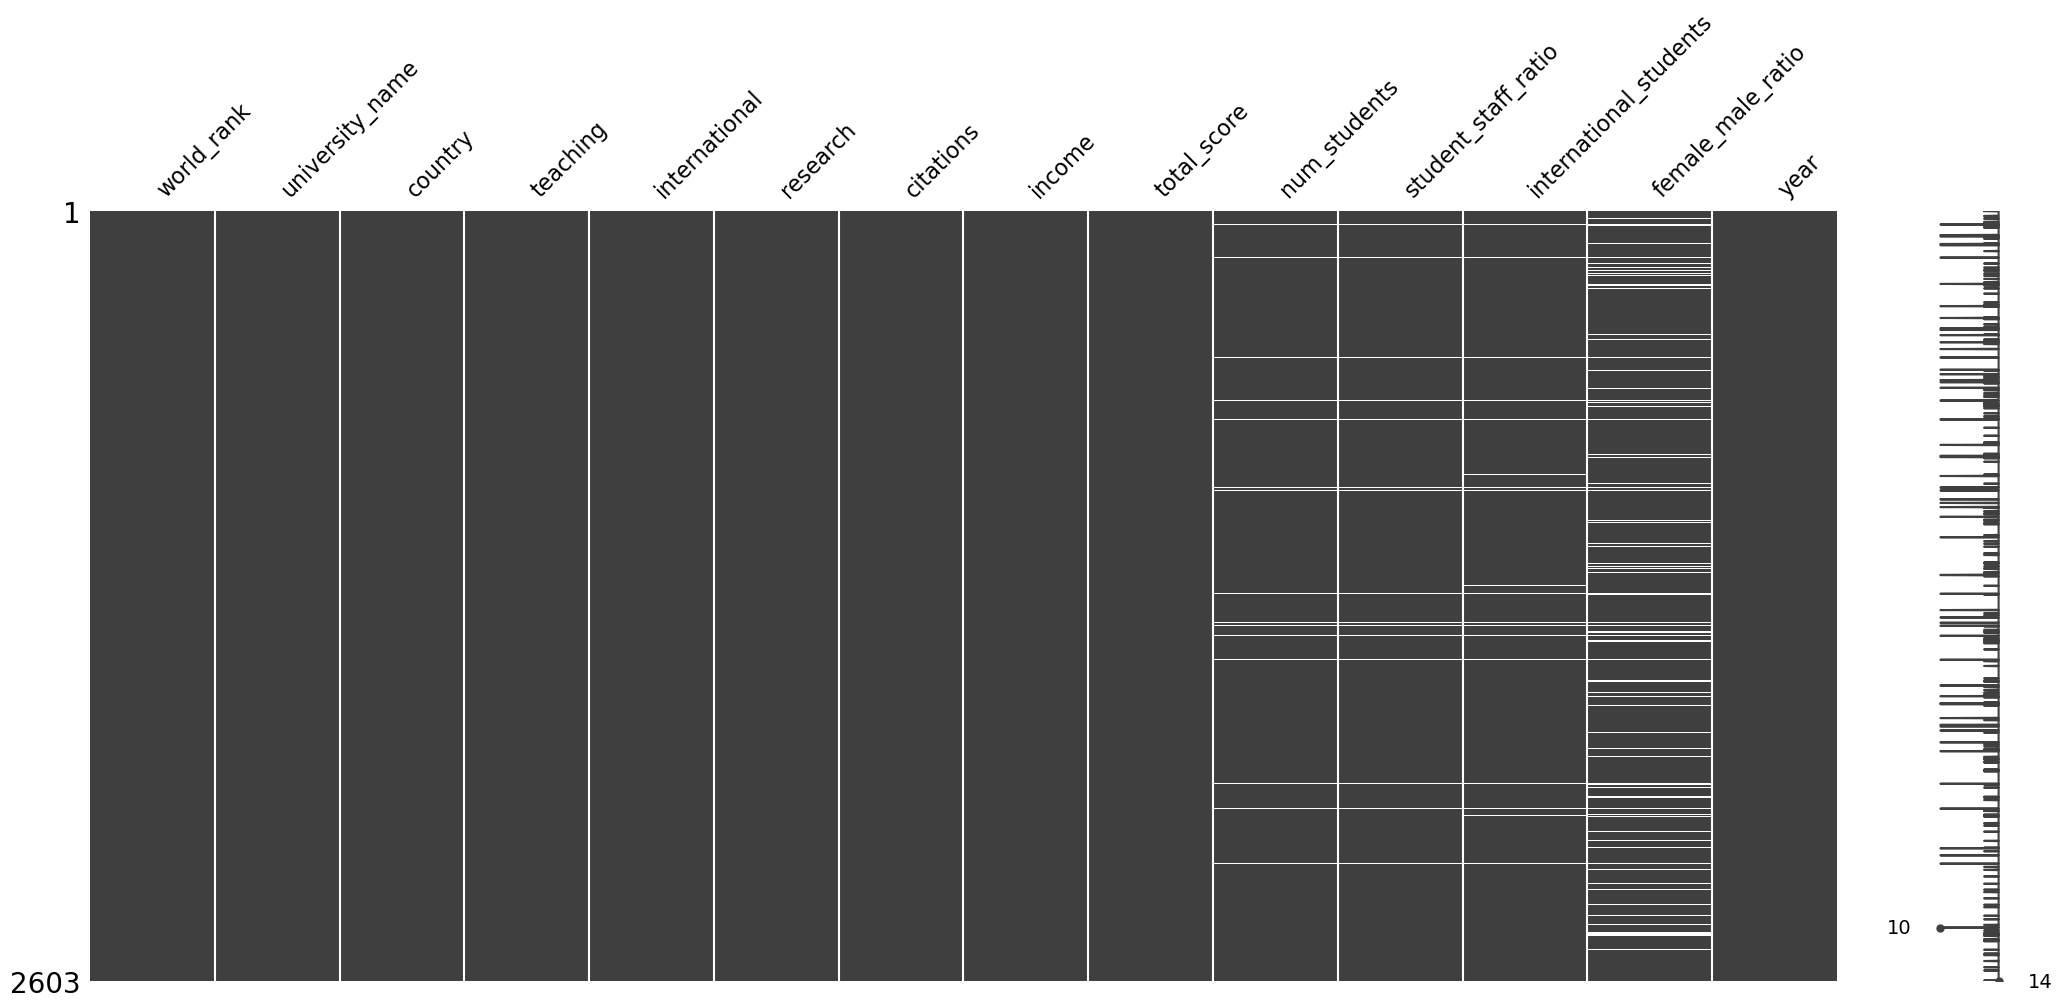

In [9]:
import missingno
missingno.matrix(timesData);

In [12]:
timesData.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [10]:
df = timesData.iloc[:100, :]
df.shape

(100, 14)

In [11]:
import plotly.graph_objs as go

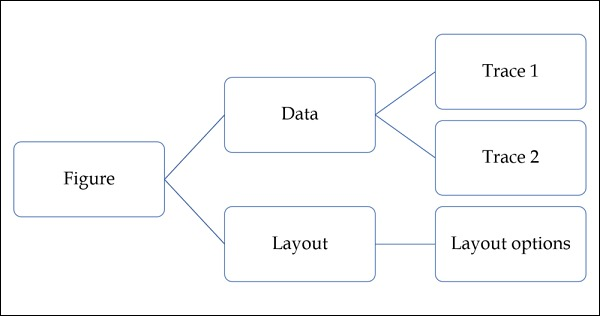

Bu görsel plotly de figure şemasını göstermektedir.

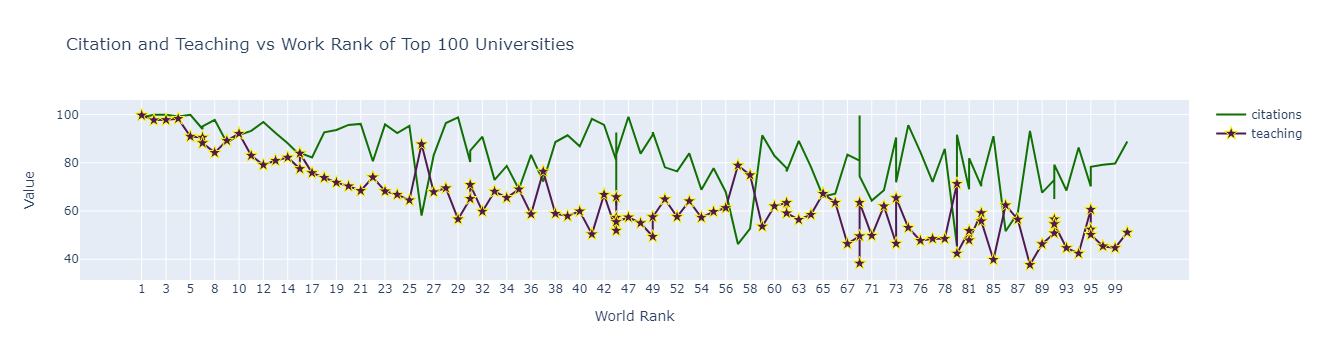

In [12]:
#plt.style.use("ggplot")
# creating trace 1

trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",    # Bu dağılım izi için çizim modunu belirler. "mode=text" ise text'i yazdırır "text" öğeleri koordinatlarda görünür. 
                                       # Aksi takdirde, fareyle üzerine gelindiğinde "text" öğeleri görünür. 
                                       # 20'den az nokta varsa ve iz yığınlanmamışsa varsayılan değer "lines+markers"dir. Aksi takdirde, "lines".
                    name = "citations",
                    marker = dict(color = "rgb(16, 112, 2)"), # {"color" : "rgb(16, 112, 2)"}
                    text = df.university_name)

# creating trace 2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines + markers",
                    name = "teaching",
                    marker = dict(color = "rgb(80,26,80)",
                                  size = 10,
                                  symbol = "star", 
                                  line = dict(
                                         color = "yellow",
                                         width = 1),),
                    text = df.university_name)

data = [trace1, trace2]

layout = dict(title = "Citation and Teaching vs Work Rank of Top 100 Universities", #axes olarak düşünebiliriz
              xaxis = dict(title = "World Rank", ticklen = 5, tickcolor = "crimson", zeroline = False),
              yaxis = dict(title = "Value", ticklen = 5, tickcolor = "crimson", zeroline = False))

fig = dict(data = data, layout = layout)  #figure içine yukarıda tanımladığımız grafik değişkenlerini ve layout parametrelerini dict olarak verip 
iplot(fig)                                #iplot(fig) ile çizdiriyoruz.


## Zero Kullanımı

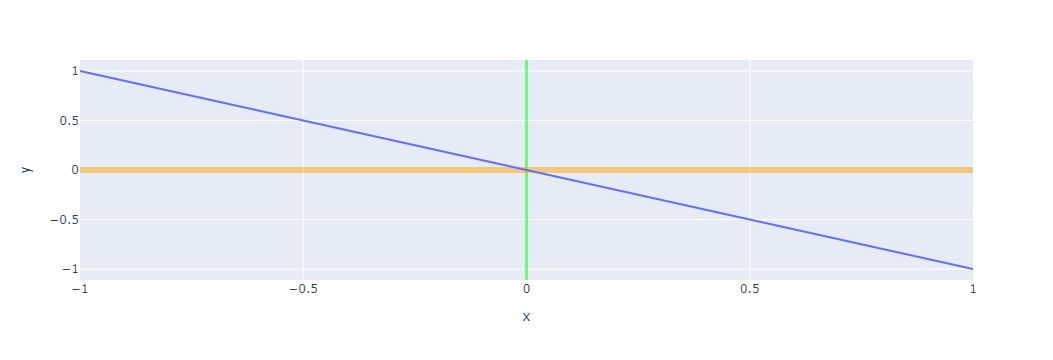

In [16]:
fig = px.line(y=[1, -1], x=[-1,1])

fig.update_xaxes(zeroline=True, zerolinewidth=3, zerolinecolor='rgba(0,255,0,0.5)') #zerolinecolor='red' bu sekilde de kullanilabilir
fig.update_yaxes(zeroline=True, zerolinewidth=6, zerolinecolor='rgba(255,165,0,0.5)') # zeroline sifir cizgisi demek

fig.show()

## Ticklen Kullanımı

Seaborn da olduğu gibi plotlyde de içine embed veri setleri var. Bunlardan çalışalım biraz ülkelerin popülasyonu ile ilgili bir veri seti çağıracağız.

data setleri hakkında kısa bilgi için "http://plotly.github.io/datasets/

In [13]:
dataset_list = dir(px.data)
print(dataset_list)

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'absolute_import', 'carshare', 'election', 'election_geojson', 'experiment', 'gapminder', 'iris', 'medals_long', 'medals_wide', 'stocks', 'tips', 'wind']


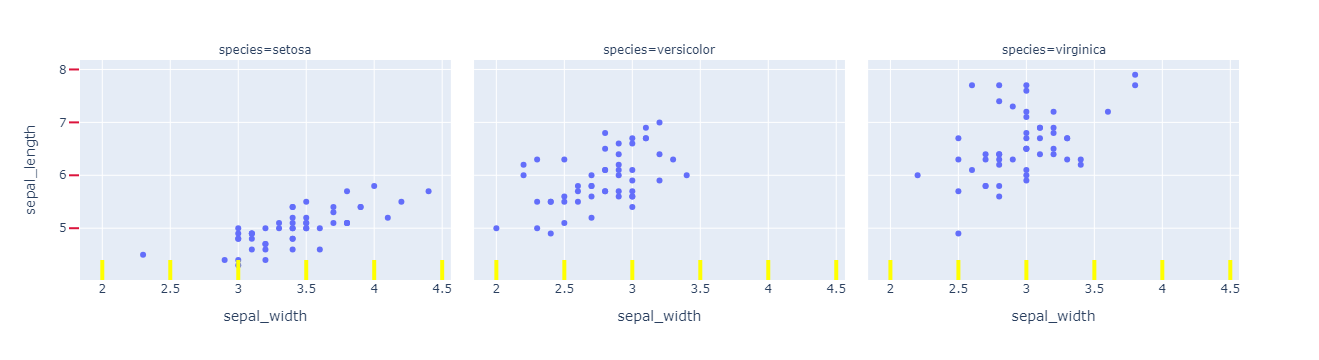

In [16]:
df = px.data.iris()

fig = px.scatter(df, x="sepal_width", y="sepal_length", facet_col="species")
fig.update_xaxes(ticks="inside", tickwidth=4, tickcolor='yellow', ticklen=20)
fig.update_yaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=10, col=1) 
#col=1 bu kod hangi grafikte ticklen larin gorulecegini belirler hic koymazsak hepsinde gosterir

fig.show()

In [17]:
dataset = sns.load_dataset('tips')

dataset.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<Figure size 1200x500 with 0 Axes>

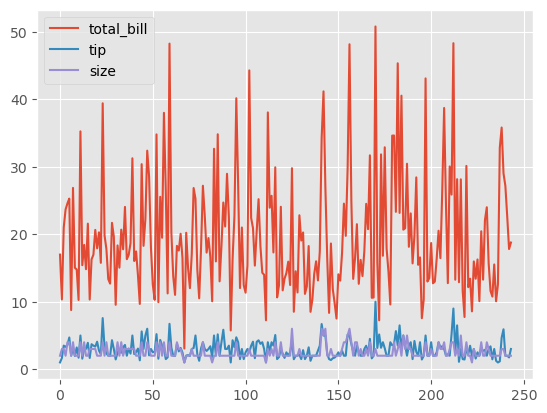

In [21]:
plt.style.use('ggplot')

dataset2 = dataset[["total_bill", "tip", "size"]]

dataset2.plot();

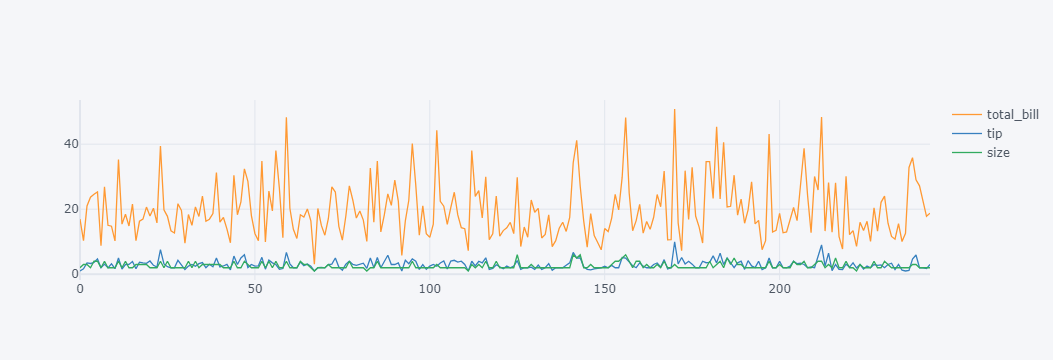

In [23]:
plt.style.use('ggplot')

dataset2 = dataset[["total_bill", "tip", "size"]]

dataset2.iplot();

## Scatter Plot

In [22]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100, :]  # iloc ile indexleme yaparak istediğimiz yıllara ait verileri yeni df olarak oluşturuyoruz.  
df2015 = timesData[timesData.year == 2015].iloc[:100, :]
df2016 = timesData[timesData.year == 2016].iloc[:100, :]

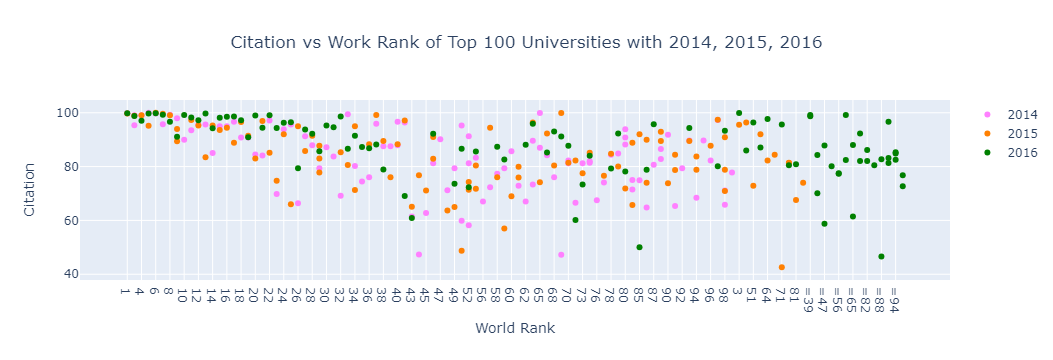

In [24]:
# creating trace 1
trace1 = go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = "rgb(255,128,255)"),
                    text = df2014.university_name)

# creating trace 2
trace2 = go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = "rgb(255,128,2)"),
                    text = df2015.university_name)

# creating trace 3
trace3 = go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = "green"),
                    text = df2016.university_name)
data = [trace1, trace2, trace3]

layout = dict(title = "Citation vs Work Rank of Top 100 Universities with 2014, 2015, 2016",title_x = 0.5, title_y = 0.9,
             xaxis = dict(title = "World Rank"),
             yaxis = dict(title = "Citation"))

fig = dict(data = data, layout = layout)
iplot(fig)

## Bar Charts

Datamız yıllara sari olarak ülke bilgilerini içeriyor

LifeExp=Ortalama Ömür

pop = popülasyon

gdpPercap = kişi başı gelir yıllık yada kişi alım gücü

iso_num = ülkenin numarası

In [24]:
gm = px.data.gapminder()
gm

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
1699      716  
1700      716  
1701      716  
1702      716  
1703      716  

[1704 rows x 8 columns]

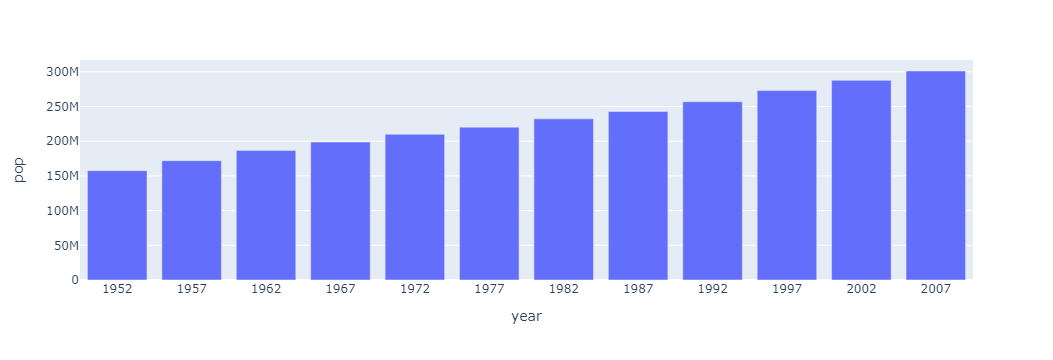

In [25]:
gm_usa = px.data.gapminder().query("country =='United States'")

fig = px.bar(gm_usa, x="year", y="pop")

fig.update_xaxes(tickmode="linear", tick0=1952, dtick=5) #baslangic nok.1952 ve yillar 5 er 5er gitsin
# fig.update_yaxes(dtick=20000000)  

fig.show()

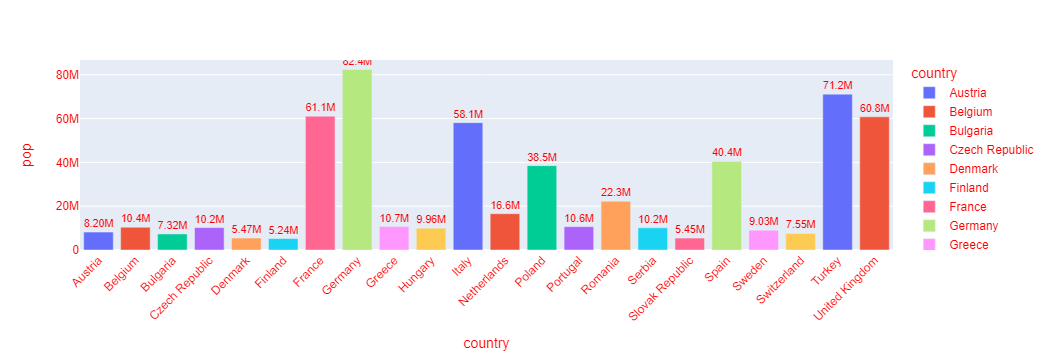

In [26]:
df_europe = px.data.gapminder().query("continent =='Europe' and year == 2007 and pop > 5.e6" )

fig = px.bar(df_europe, y= "pop", x= "country", text = "pop", color ="country")

fig.update_traces(textposition = "outside", texttemplate = "%{text:.3s}", textfont_size=12) #int, s, f verdiğimizde type göre işlem yapıyor

fig.update_layout(xaxis_tickangle = -45,
                  font_family="Arial",
                  font_color="red",
                  font_size = 12)

## Pie Chart

In [25]:
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

df = df2016.num_students

df.count()

7

In [26]:
df

1803     2,243
1804    19,919
1805    15,596
1806    18,812
1807    11,074
1808    20,152
1809     7,929
Name: num_students, dtype: object

In [27]:
df1 = (df.str.replace(",", "")).astype("float")

In [28]:
df2 = list((df.str.replace(",", "")).astype("float"))

In [29]:
pie_list =[float(each.replace(",", ""))for each in df2016.num_students]
pie_list

[2243.0, 19919.0, 15596.0, 18812.0, 11074.0, 20152.0, 7929.0]

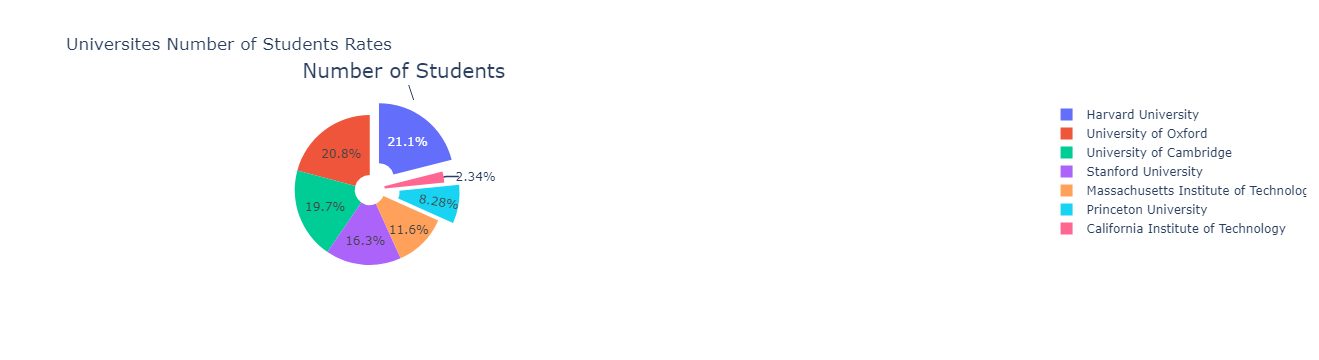

In [42]:
labels = df2016.university_name
# figure
fig = {
    "data" : [
        {
            "values" : pie_list,
            "labels" : labels,
            "domain" : {"x": [0, .5]}, # grafigin hangi alanda olacagini ayarlar
            "name" : "Number of Students Rates",
            "hoverinfo" : "label+percent", # label+value+percent, label, value
            "hole" : .2,
            "type" : "pie",
            "pull" : [0,0,0,0,0, 0.2, 0.2] #exploded
        },
    ],
    "layout" : {
        "title" : "Universites Number of Students Rates",
        "annotations" : [
            {"font" : {"size" : 20},
             "text" : "Number of Students",
             "x" : 0.3,
             "y" : 1
            },
        ]
    }
}
iplot(fig)

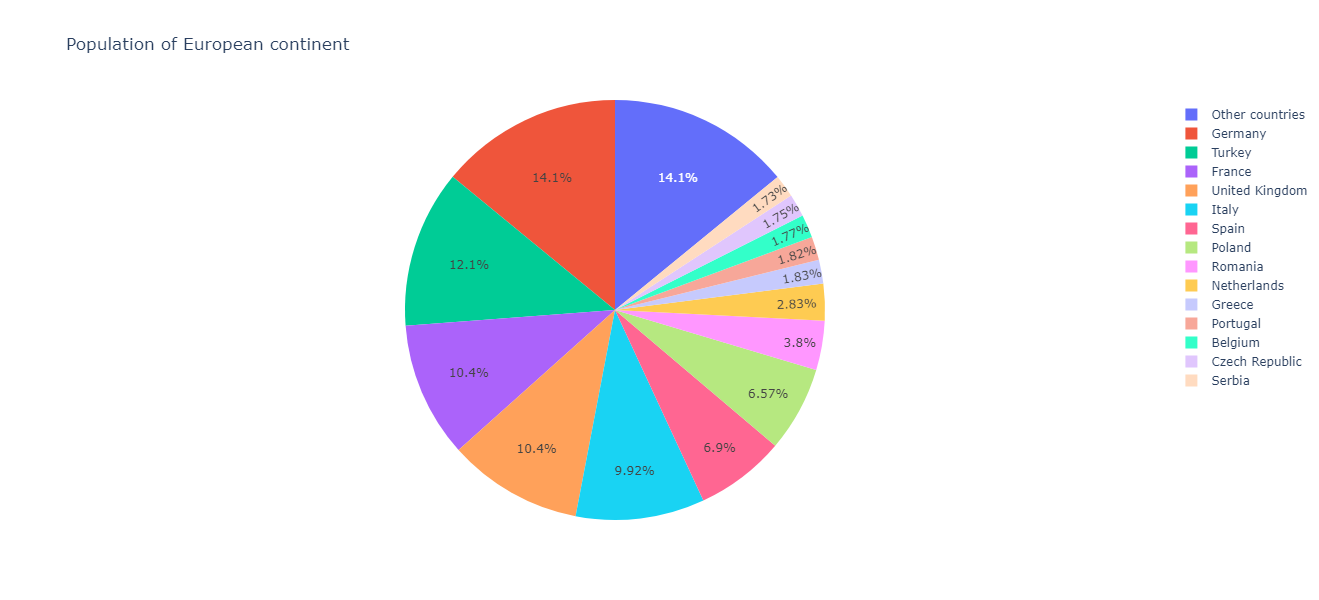

In [40]:
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 10.e6, 'country'] = 'Other countries' # Represent only large countries

fig = px.pie(df, values='pop', names='country', title='Population of European continent',width=800, height=600)

fig.show()

## Bubble Chart

In [34]:
df2016 = timesData[timesData.year == 2016].iloc[:20,:]

num_students_size = [float(each.replace(",", ".")) for each in df2016.num_students]
num_students_size

[2.243,
 19.919,
 15.596,
 18.812,
 11.074,
 20.152,
 7.929,
 15.06,
 18.178,
 14.221,
 15.128,
 11.751,
 36.186,
 26.607,
 25.055,
 38.206,
 20.376,
 21.424,
 66.198,
 15.172]

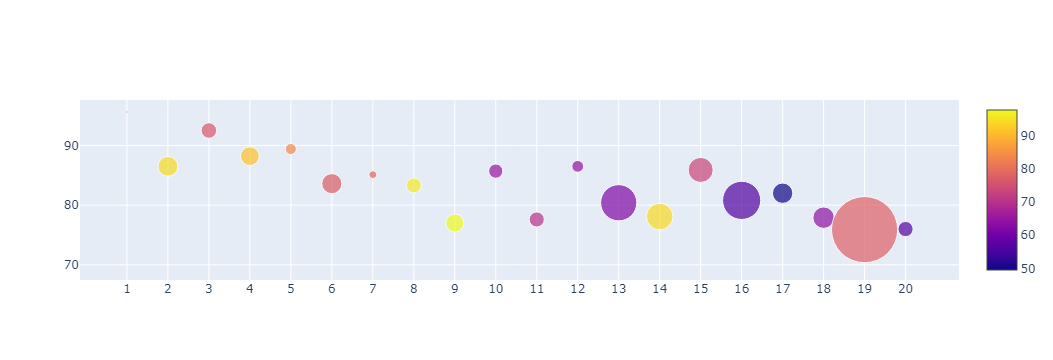

In [35]:
df2016.international

international_color = [float(each) for each in df2016.international]

data = [
    {
        "y" : df2016.teaching,
        "x" : df2016.world_rank,
        "mode" : "markers",
        "marker" : {
            "color" : international_color,
            "size" : num_students_size,
            "showscale" : True
        },
        "text" : df2016.university_name
    }
]
iplot(data)

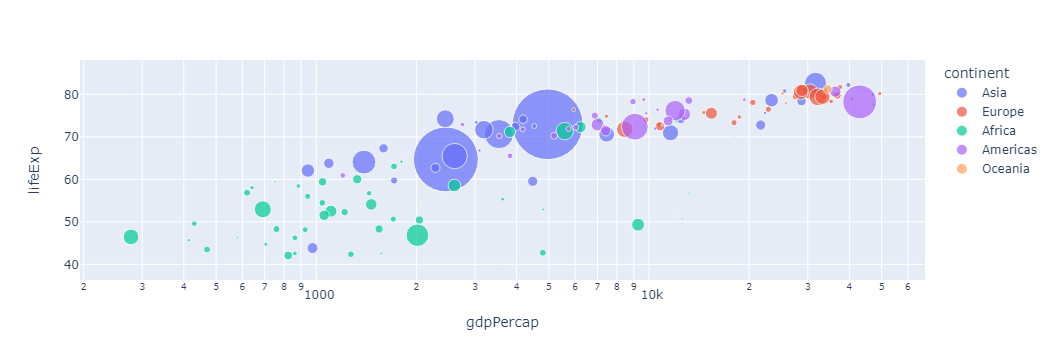

In [36]:
df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), x = "gdpPercap", y = "lifeExp",
                size = "pop", color = "continent", 
                 hover_name = "country", log_x = True, size_max = 50)

fig

## Map 

In [31]:
df = px.data.carshare()

df.head(3)

centroid_lat  centroid_lon    car_hours  peak_hour
0     45.471549    -73.588684  1772.750000          2
1     45.543865    -73.562456   986.333333         23
2     45.487640    -73.642767   354.750000         20

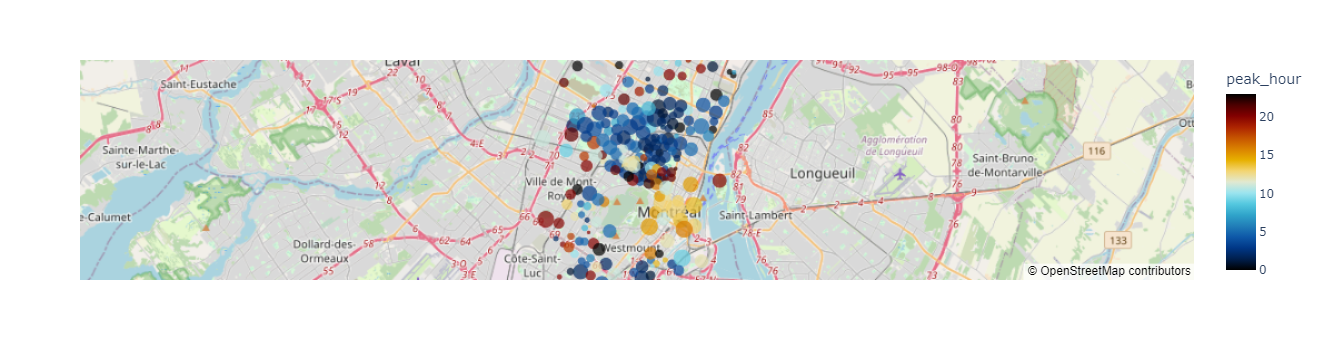

In [36]:
df = px.data.carshare()

fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon", color="peak_hour", size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10, mapbox_style="open-street-map")
fig.show()

# open-street-map, stamen-terrain, stamen-toner, carto-positron, white-bg,carto-darkmatter

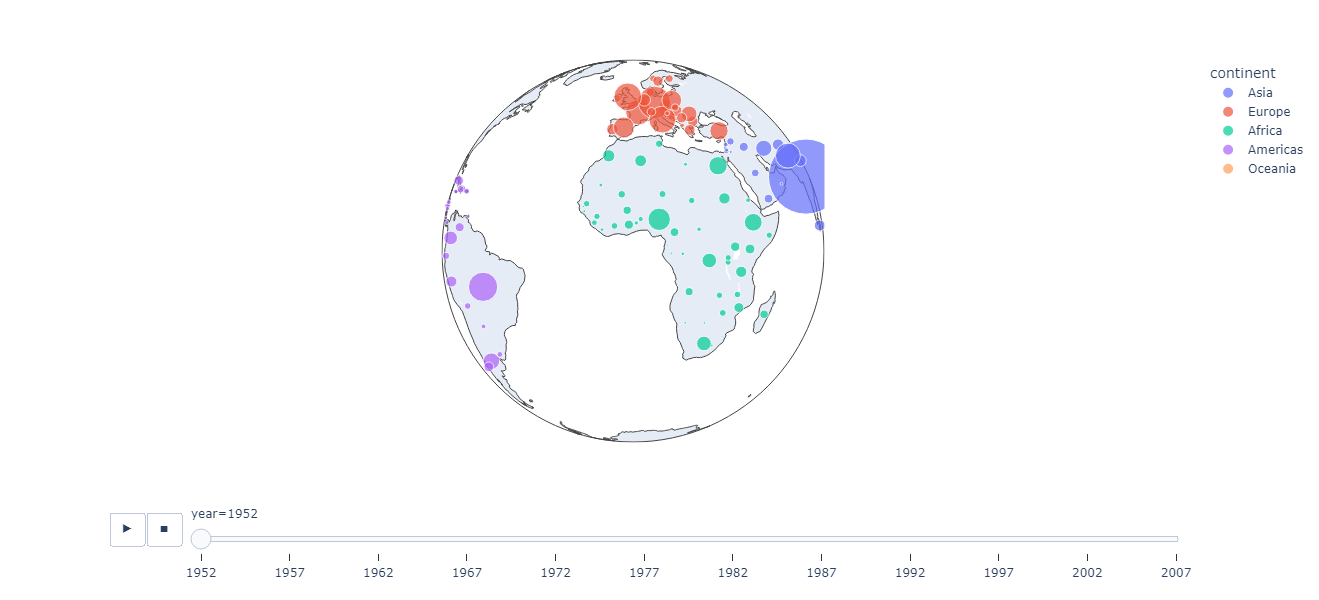

In [39]:
df_6 = px.data.gapminder()

fig = px.scatter_geo(df_6, locations="iso_alpha", color="continent", hover_name="country", size="pop",width=800, height=600,
               animation_frame="year", projection="orthographic", size_max = 100)
fig.show()

# equirectangular, mercator, orthographic, kavrayskiy7, robinson, miller,natural earth

## WordCloud

In [40]:
timesData.head()

world_rank                        university_name                   country  \
0          1                     Harvard University  United States of America   
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   
3          4                    Stanford University  United States of America   
4          5                   Princeton University  United States of America   

   teaching international  research  citations income total_score  \
0      99.7          72.4      98.7       98.8   34.5        96.1   
1      97.7          54.6      98.0       99.9   83.7        96.0   
2      97.8          82.3      91.4       99.9   87.5        95.6   
3      98.3          29.5      98.1       99.2   64.3        94.3   
4      90.9          70.3      95.4       99.9      -        94.2   

  num_students  student_staff_ratio international_students female_male_ratio  \
0       20,152                  8.9                    25%               NaN   
1        2,243                  6.9                    27%           33 : 67   
2       11,074                  9.0                    33%           37 : 63   
3       15,596                  7.8                    22%           42 : 58   
4        7,929                  8.4                    27%           45 : 55   

   year  
0  2011  
1  2011  
2  2011  
3  2011  
4  2011

In [41]:
x2011 = timesData.country[timesData.year == 2011]
x2011.head()

0    United States of America
1    United States of America
2    United States of America
3    United States of America
4    United States of America
Name: country, dtype: object

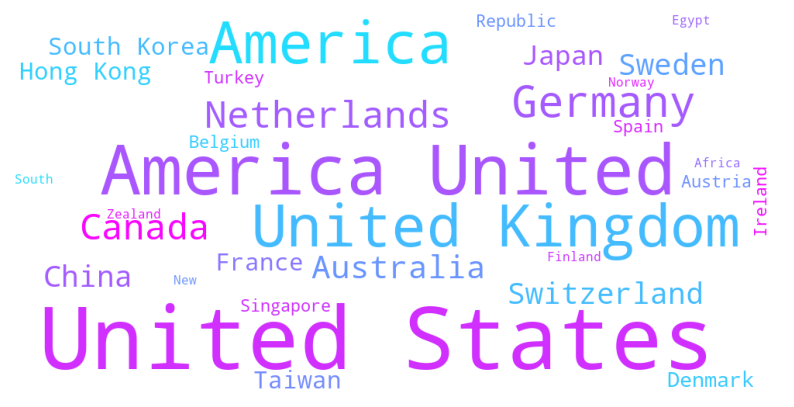

In [42]:
x2011 = timesData.country[timesData.year == 2011]

plt.subplots(figsize = (10, 10))

wordcloud = WordCloud(background_color= "white",
                      width = 1000,
                      height= 500,colormap="cool").generate(" ".join(x2011))

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("graph.png") # save graph in your computer

plt.show()

## 3D Scatter plot

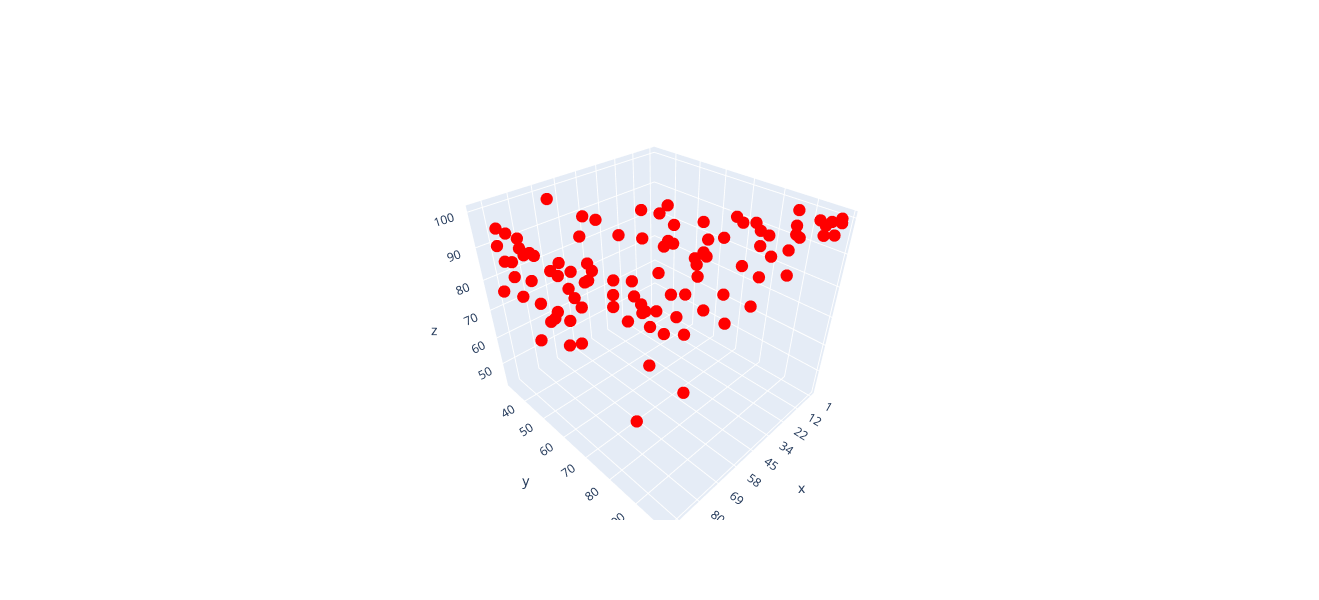

In [44]:
trace1 = go.Scatter3d(
                    x = df2015.world_rank,
                    y = df2015.research,
                    z = df2015.citations,
                    mode = "markers",
                    marker = dict(size = 7, color = "rgb(255, 0, 0)",symbol='circle')
                    )

data = [trace1]
layout = go.Layout(
                )
fig = go.Figure(data = data, layout = layout)
fig.update_layout(width=800, height=600)

iplot(fig)

In [46]:
df_5 = px.data.tips()

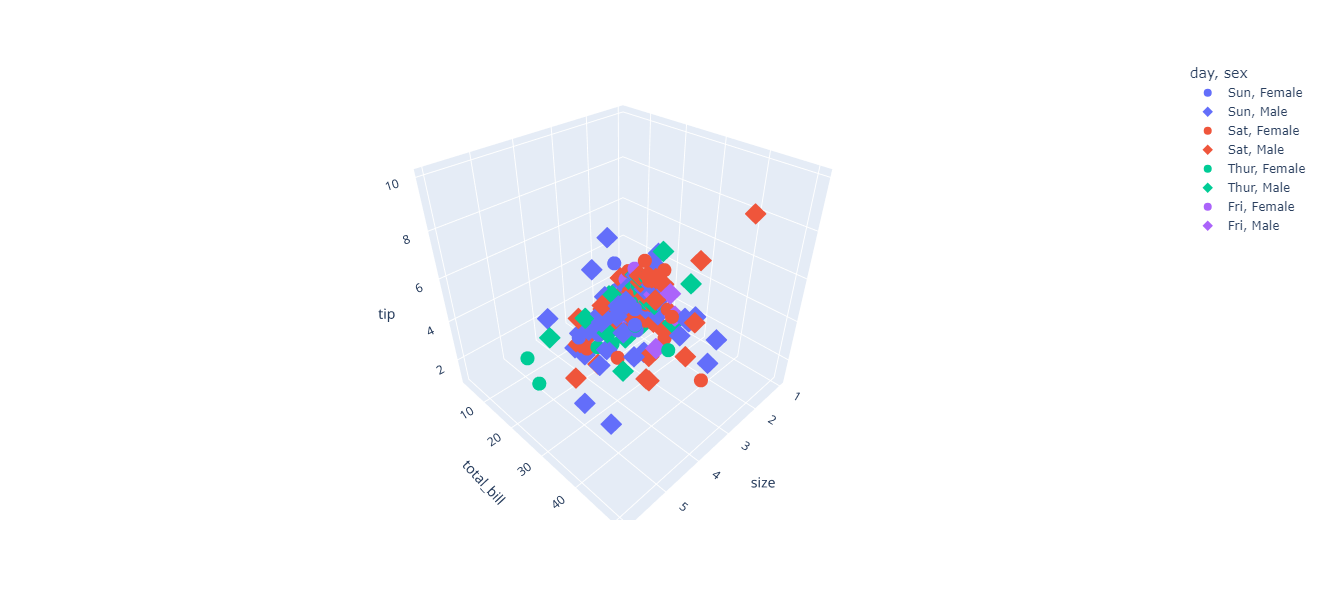

In [47]:
import plotly.express as px

fig = px.scatter_3d(df_5, x='size', y='total_bill', z='tip', color='day', symbol='sex',width=800, height=600)

fig.show()

## Imread

In [51]:
#pip install scikit-image

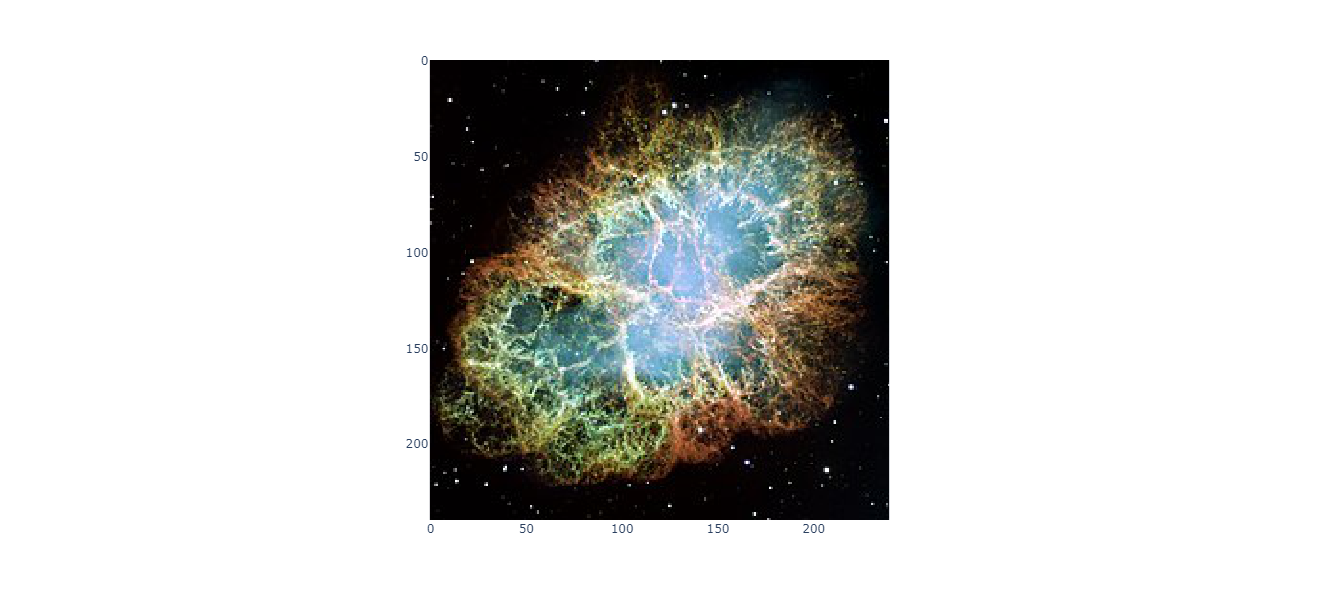

In [48]:
from skimage import io

img = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Crab_Nebula.jpg/240px-Crab_Nebula.jpg')
fig = px.imshow(img)
fig.update_layout(width=800, height=600)

fig.show()

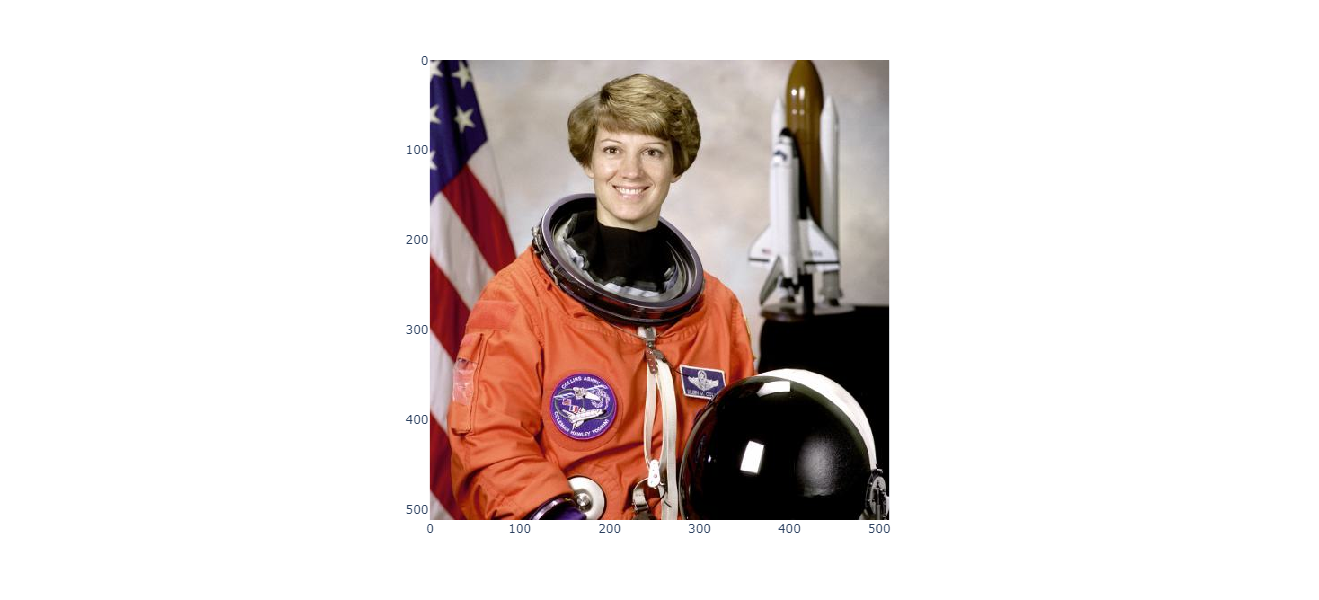

In [57]:
from skimage import data

img = data.astronaut()
fig = px.imshow(img, binary_format="jpeg", binary_compression_level=0)
dosya_yolu = 'C:/Users/lenovo/Desktop/IT_Course/astronaut.jpg' # bu kod bu resmi localimize kaydeder
io.imsave(dosya_yolu, img)
fig.update_layout(width=800, height=600)

fig.show()

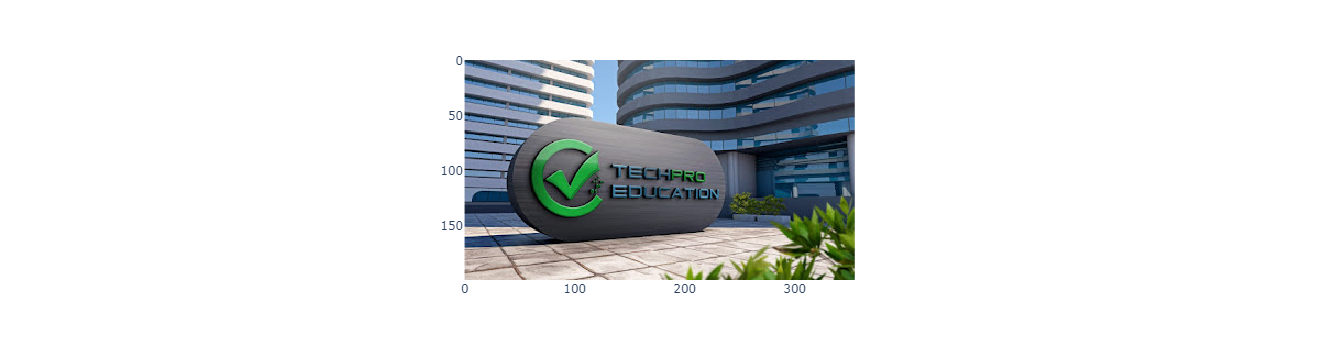

In [58]:
img = io.imread('https://www.google.com/maps/uv?pb=!1s0x89c7651137ee3fa9%3A0xa6aa7c9619d85c2e!3m1!7e115!4shttps%3A%2F%2Flh5.googleusercontent.com%2Fp%2FAF1QipPbXVpdQoJGN9uNBz7yABLaMAMrPhUv8DFQzfjB%3Dw355-h200-k-no!5stechpro%20-%20Google%27da%20Ara!15sCgIgAQ&imagekey=!1e10!2sAF1QipPbXVpdQoJGN9uNBz7yABLaMAMrPhUv8DFQzfjB&hl=tr&sa=X&ved=2ahUKEwil9bXToI_5AhVlXfEDHbC8BrsQoip6BAhJEAM')
fig = px.imshow(img)

fig.show()